In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
df = pd.read_csv('/content/Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [56]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [57]:
df.drop(['Id','UserId','ProfileName','HelpfulnessNumerator','HelpfulnessDenominator','Time','Summary'],axis=1,inplace=True)
df.head()

,ProductId,Score,Text
0,B001E4KFG0,5,I have bought several of the Vitality canned d...
1,B00813GRG4,1,Product arrived labeled as Jumbo Salted Peanut...
2,B000LQOCH0,4,This is a confection that has been around a fe...
3,B000UA0QIQ,2,If you are looking for the secret ingredient i...
4,B006K2ZZ7K,5,Great taffy at a great price. There was a wid...


In [58]:
df["Score"] = 2 * (df["Score"] - 1) / (5 - 1) - 1

In [59]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['ProductId'] = le.fit_transform(df['ProductId'])
df.head()

,ProductId,Score,Text
0,27619,1.0,I have bought several of the Vitality canned d...
1,72383,-1.0,Product arrived labeled as Jumbo Salted Peanut...
2,15267,0.5,This is a confection that has been around a fe...
3,19718,-0.5,If you are looking for the secret ingredient i...
4,69007,1.0,Great taffy at a great price. There was a wid...


In [60]:
df.describe()

,ProductId,Score
count,568454.000000,568454.000000
mean,34784.498974,0.591599
std,21221.163955,0.655218
min,0.000000,-1.000000
25%,15996.000000,0.500000
50%,32923.000000,1.000000
75%,51384.000000,1.000000
max,74257.000000,1.000000


In [61]:
for i in range(1):
    filtered_df = df[df['ProductId'] == i]  # Filter data
    L = []  # List for processed text
    S = []  # List for scores

    for index, row in filtered_df.iterrows():
        text = row['Text'].lower()  # Convert text to lowercase
        text = "".join(c for c in text if c.isalpha() or c.isspace())  # Keep only letters and spaces
        L.append(text)
        S.append(row['Score'])  # Append score

print(L)
print(len(L))
print(S)


['these days when a person says chicken soup theyre probably going to follow up those words with for the soul or maybe for the teenaged soul  didnt used to be that way  why i can remember a time when if a person said chicken soup those words were followed by an enthusiastic with rice  such was the power of maurice sendaks catchy  childrens book  i am pleased to report that if you care to read this book again today you will find it hasnt dimished a jot in terms of frolicksome fun  in this book we are led through a whirlwind chicken soup year with our host a boy who bears no little resemblance to sendaks other great rhyming tale pierre in looks if not demeanor  its a catchy flouncy bouncy combo of soup and the people who love it sobr br this is ostensibly a book meant to teach your children the different months of the year  each month gets its own rhythmic poem and accompanying illustration  these are fairly simple pen and ink drawings with the occasional splash of blue in varying shades

In [62]:
for i in range(len(L)):
    D = {}
    for word in L[i].split():
        D[word] = D.get(word, 0) + 1
    L[i] = D

print(L)

[{'these': 2, 'days': 1, 'when': 2, 'a': 17, 'person': 2, 'says': 1, 'chicken': 9, 'soup': 16, 'theyre': 1, 'probably': 1, 'going': 1, 'to': 17, 'follow': 1, 'up': 4, 'those': 2, 'words': 2, 'with': 12, 'for': 3, 'the': 23, 'soul': 2, 'or': 2, 'maybe': 2, 'teenaged': 1, 'didnt': 1, 'used': 1, 'be': 1, 'that': 4, 'way': 1, 'why': 2, 'i': 10, 'can': 3, 'remember': 2, 'time': 2, 'if': 6, 'said': 1, 'were': 1, 'followed': 1, 'by': 2, 'an': 3, 'enthusiastic': 1, 'rice': 6, 'such': 1, 'was': 2, 'power': 1, 'of': 13, 'maurice': 1, 'sendaks': 2, 'catchy': 2, 'childrens': 1, 'book': 7, 'am': 2, 'pleased': 1, 'report': 1, 'you': 7, 'care': 1, 'read': 2, 'this': 8, 'again': 1, 'today': 1, 'will': 1, 'find': 1, 'it': 5, 'hasnt': 1, 'dimished': 1, 'jot': 1, 'in': 9, 'terms': 1, 'frolicksome': 1, 'fun': 1, 'we': 1, 'are': 2, 'led': 1, 'through': 1, 'whirlwind': 1, 'year': 3, 'our': 2, 'host': 1, 'boy': 1, 'who': 2, 'bears': 1, 'no': 1, 'little': 1, 'resemblance': 1, 'other': 1, 'great': 1, 'rhyming'

In [63]:
stop_words = ['/><br',"i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

for D in L:
    filtered_words = [word for word in D if word not in stop_words]

    for word in list(D.keys()):
        if word not in filtered_words:
            del D[word]

In [64]:
for D in L:
  sorted_items = sorted(D.items(), key=lambda x: x[1], reverse=True)
  limited_dict = dict(sorted_items[:20])

  print(limited_dict)

{'soup': 16, 'chicken': 9, 'book': 7, 'rice': 6, 'year': 3, 'br': 3, 'months': 3, 'could': 3, 'whoopy': 3, 'person': 2, 'words': 2, 'soul': 2, 'maybe': 2, 'remember': 2, 'time': 2, 'sendaks': 2, 'catchy': 2, 'read': 2, 'tale': 2, 'teach': 2}
{'book': 4, 'month': 3, 'going': 3, 'children': 1, 'love': 1, 'first': 1, 'grader': 1, 'got': 1, 'christmas': 1, 'loves': 1, 'read': 1, 'rhymes': 1, 'proud': 1, 'teacher': 1, 'works': 1, 'classnot': 1, 'reads': 1, 'independently': 1, 'yet': 1, 'girls': 1}
{'amount': 2, 'book': 2, 'ordered': 1, 'large': 1, 'books': 1, 'share': 1, 'child': 1, 'care': 1, 'providers': 1, 'greatly': 1, 'disappointed': 1, 'arrived': 1, 'paid': 1, 'expecting': 1, 'larger': 1, 'x': 1, 'inch': 1, 'delivered': 1, 'looked': 1, 'like': 1}
{'one': 3, 'read': 3, 'book': 2, 'us': 2, 'earliest': 1, 'memories': 1, 'mother': 1, 'constantly': 1, 'quoted': 1, 'nonstop': 1, 'fact': 1, 'typical': 1, 'sort': 1, 'soup': 1, 'would': 1, 'beg': 1, 'grocery': 1, 'bookbr': 1, 'br': 1, 'since':

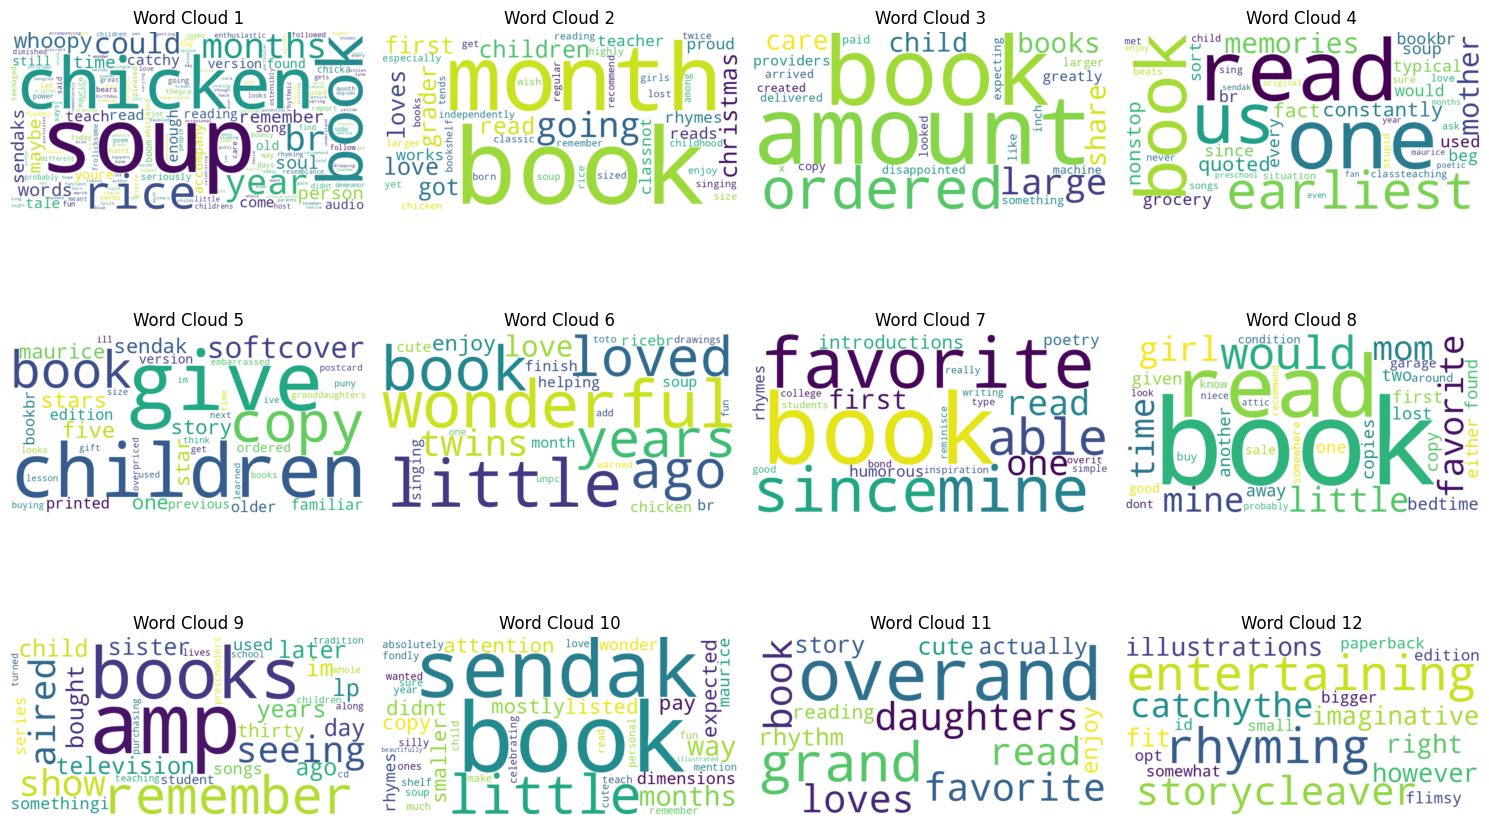

In [13]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

L1 = L[:12]

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
axes = axes.flatten()

for i, D in enumerate(L1):
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(D)

    axes[i].imshow(wordcloud, interpolation="bilinear")
    axes[i].axis("off")
    axes[i].set_title(f"Word Cloud {i+1}")


plt.tight_layout()
plt.show()

In [14]:
def porter_stemmer(word):
    vowels = "aeiou"

    if word.endswith("sses"):
        word = word[:-2]
    elif word.endswith("ies"):
        word = word[:-2]
    elif word.endswith("ss"):
        pass
    elif word.endswith("s"):
        word = word[:-1]

    if word.endswith("eed"):
        word = word[:-1]
    elif "a" in word[:-2] or "e" in word[:-2] or "i" in word[:-2] or "o" in word[:-2] or "u" in word[:-2]:
        if word.endswith("ed"):
            word = word[:-2]
        elif word.endswith("ing"):
            word = word[:-3]

    if word.endswith("y") and any(c in vowels for c in word[:-1]):
        word = word[:-1] + "i"

    step2_suffixes = {
        "ational": "ate", "tional": "tion", "enci": "ence", "anci": "ance",
        "izer": "ize", "abli": "able", "alli": "al", "entli": "ent", "eli": "e",
        "ousli": "ous", "ization": "ize", "ation": "ate", "ator": "ate",
        "alism": "al", "iveness": "ive", "fulness": "ful", "ousness": "ous",
        "aliti": "al", "iviti": "ive", "biliti": "ble"
    }
    for suffix in step2_suffixes:
        if word.endswith(suffix):
            word = word[:-len(suffix)] + step2_suffixes[suffix]
            break

    step3_suffixes = {
        "icate": "ic", "ative": "", "alize": "al", "iciti": "ic",
        "ical": "ic", "ful": "", "ness": ""
    }
    for suffix in step3_suffixes:
        if word.endswith(suffix):
            word = word[:-len(suffix)] + step3_suffixes[suffix]
            break

    step4_suffixes = ["al", "ance", "ence", "er", "ic", "able", "ible", "ant",
                      "ement", "ment", "ent", "ion", "ou", "ism", "ate", "iti",
                      "ous", "ive", "ize"]
    for suffix in step4_suffixes:
        if word.endswith(suffix):
            word = word[:-len(suffix)]
            break

    if word.endswith("e"):
        word = word[:-1]

    return word


for i in range(len(L)):
    SD = {}
    for word, f in L[i].items():
        Sword = porter_stemmer(word)
        if Sword in SD:
            SD[Sword] += f
        else:
            SD[Sword] = f
    L[i] = SD

print(L)

[{'dai': 2, 'person': 2, 'sai': 2, 'chicken': 9, 'soup': 16, 'theyr': 1, 'prob': 1, 'go': 1, 'follow': 2, 'word': 2, 'soul': 2, 'mayb': 2, 'teenag': 1, 'didnt': 1, 'us': 1, 'wai': 1, 'rememb': 2, 'tim': 2, 'said': 1, 'enthusiast': 1, 'ric': 6, 'pow': 1, 'mauric': 1, 'sendak': 3, 'catchi': 2, 'children': 2, 'book': 7, 'pleas': 1, 'report': 1, 'car': 1, 'read': 5, 'todai': 1, 'find': 1, 'hasnt': 1, 'dimish': 1, 'jot': 1, 'term': 1, 'frolicksom': 1, 'fun': 1, 'led': 1, 'whirlwind': 1, 'year': 4, 'host': 1, 'boi': 1, 'bear': 1, 'littl': 1, 'resembl': 1, 'great': 1, 'rhym': 1, 'tal': 2, 'pierr': 1, 'look': 1, 'demeanor': 1, 'flounci': 1, 'bounci': 1, 'combo': 1, 'peopl': 1, 'lov': 1, 'sobr': 1, 'br': 3, 'ostensibli': 1, 'm': 1, 'teach': 2, 'differ': 1, 'month': 4, 'get': 2, 'rhythm': 1, 'poem': 2, 'accompani': 3, 'illustr': 1, 'fairli': 1, 'simpl': 1, 'pen': 1, 'ink': 1, 'draw': 1, 'occasion': 1, 'splash': 1, 'blu': 1, 'vari': 1, 'shad': 1, 'yellow': 1, 'grai': 1, 'green': 1, 'mai': 1, 'won

In [65]:
import math

df1 = {}
total_docs = len(L)

for doc in L:
    for word in doc:
        df1[word] = df1.get(word, 0) + 1


tfidf_docs = []
for doc in L:
    total_words = sum(doc.values())
    tfidf = {}
    for word, count in doc.items():
        tf = count / total_words
        idf = math.log(total_docs / df1[word])
        tfidf[word] = tf * idf
    tfidf_docs.append(tfidf)


for i, tfidf in enumerate(tfidf_docs):
    print(f"Document {i+1} TF-IDF:", tfidf)

Document 1 TF-IDF: {'days': 0.009958261884246686, 'person': 0.02464790384057491, 'says': 0.012323951920287455, 'chicken': 0.037260081087415305, 'soup': 0.0614886696440259, 'theyre': 0.009958261884246686, 'probably': 0.009958261884246686, 'going': 0.009958261884246686, 'follow': 0.012323951920287455, 'words': 0.017148843849666313, 'soul': 0.02464790384057491, 'maybe': 0.02464790384057491, 'teenaged': 0.012323951920287455, 'didnt': 0.008574421924833157, 'used': 0.006830989761809298, 'way': 0.007592571848205918, 'remember': 0.015185143696411836, 'time': 0.011365240707091544, 'said': 0.012323951920287455, 'followed': 0.012323951920287455, 'enthusiastic': 0.012323951920287455, 'rice': 0.03409572212127463, 'power': 0.012323951920287455, 'maurice': 0.005682620353545772, 'sendaks': 0.013661979523618596, 'catchy': 0.017148843849666313, 'childrens': 0.007592571848205918, 'book': 0.005820322793871173, 'pleased': 0.012323951920287455, 'report': 0.012323951920287455, 'care': 0.008574421924833157, '

In [67]:
import math
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
sentiment_lexicon = analyzer.lexicon

negation_words = {
    "not", "never", "no", "none", "nobody", "nowhere", "hardly", "barely", "scarcely", "isn't", "wasn't", "weren't",
    "doesn't", "didn't", "don't", "hasn't", "haven't", "hadn't", "won't", "can't", "couldn't", "shouldn't", "wouldn't", "mightn't"
}

increasers = {
    "very", "extremely", "totally", "absolutely", "completely", "highly", "super", "amazingly", "incredibly",
    "exceptionally", "ridiculously", "unbelievably", "insanely"
}

decreasers = {
    "slightly", "somewhat", "mildly", "barely", "a bit", "kind of", "sort of", "rather", "moderately",
    "a little", "partially", "occasionally"
}


def vader_sentiment(text):
    words = text.lower().split()
    sentiment_score = 0
    word_count = 0

    for i, word in enumerate(words):

        if word in sentiment_lexicon:
            score = sentiment_lexicon[word]

            # Check for negation in the previous words
            if i > 0 and words[i - 1] in negation_words:
                score *= -0.75

            # Check for increasers
            if i > 0 and words[i - 1] in increasers:
                score *= 1.5

            # Check for decreasers
            if i > 0 and words[i - 1] in decreasers:
                score *= 0.5

            sentiment_score += score
            word_count += 1

    # Normalize score between -1 and 1
    if word_count == 0:
        return 0

    normalized_score = math.tanh(sentiment_score / word_count)
    return normalized_score

sentiment_scores =[]

for tfidf in tfidf_docs:  # Assuming tfidf_list contains multiple TF-IDF dictionaries
    text = " ".join(tfidf.keys())  # Reconstruct text using top words
    score = vader_sentiment(text)
    sentiment_scores.append(score)

print(sentiment_scores)

[0.7389735523297147, 0.9503820828744994, 0.6410769611853464, 0.8177540779702878, -0.43550211391548005, 0.9583273109626391, 0.9622180761259219, 0.7718952374404182, 0, 0.9426269761397131, 0.9747656786413226, 0.935409070603099, 0.9959493592219002, 0.8976525981658168, 0.9562374581277391, 0.9529093018793192, 0.9819734026943043, 0.9562374581277391, 0.8976525981658167, 0.9715940772546178, 0.9800963962661914, 0.9884680688821502, 0.9704519366134539, 0.9732261643446705, -0.9704519366134539, 0.9939631673505832, 0.935409070603099, 0.9740925449386083, 0.967850041432308, 0.32151273753163434, 0.9627202490767442, 0.9265348186559406, 0.9121203692077173, 0.960319388531845, 0.9800963962661914, 0.971872745913509, 0.9751366982936284]


In [68]:
import math
from collections import defaultdict
from nltk.sentiment.vader import SentimentIntensityAnalyzer  # Only using lexicon, not nltk functions

# Initialize VADER sentiment lexicon
analyzer = SentimentIntensityAnalyzer()
sentiment_lexicon = analyzer.lexicon  # Extract lexicon dictionary

# Define Negation Words
negation_words = {"not", "never", "no", "none", "nobody", "nowhere", "hardly", "barely", "scarcely",
                  "isn't", "wasn't", "weren't", "doesn't", "didn't", "don't", "hasn't", "haven't", "hadn't",
                  "won't", "can't", "couldn't", "shouldn't", "wouldn't", "mightn't"}

# Words that Increase Sentiment
increasers = {"very", "extremely", "totally", "absolutely", "completely", "highly", "super", "amazingly",
              "incredibly", "exceptionally", "ridiculously", "unbelievably", "insanely"}

# Words that Decrease Sentiment
decreasers = {"slightly", "somewhat", "mildly", "barely", "a bit", "kind of", "sort of", "rather",
              "moderately", "a little", "partially", "occasionally"}

# Function to extract aspect sentiment without spaCy or NLTK
def extract_aspect_sentiments(text, tfidf_words):
    words = text.lower().split()
    aspects = defaultdict(float)
    aspect_count = defaultdict(int)

    for i, word in enumerate(words):
        word = word.strip(".,!?")  # Remove punctuation

        # Check if word is an aspect based on TF-IDF
        if word in tfidf_words:
            sentiment_score = 0
            word_count = 0

            # Check nearby words for sentiment
            window = words[max(0, i - 3): min(len(words), i + 3)]  # Context window of 3 words
            for nearby_word in window:
                if nearby_word in sentiment_lexicon:
                    score = sentiment_lexicon[nearby_word]

                    # Handle Negation
                    if any(w in negation_words for w in window):
                        score *= -0.75  # Reduce impact instead of full negation

                    # Handle Intensity Modifiers
                    if any(w in increasers for w in window):
                        score *= 1.5
                    if any(w in decreasers for w in window):
                        score *= 0.5

                    sentiment_score += score
                    word_count += 1

            if word_count > 0:
                aspects[word] += sentiment_score
                aspect_count[word] += 1

    # Normalize sentiment scores
    for aspect in aspects:
        aspects[aspect] = math.tanh(aspects[aspect] / aspect_count[aspect])  # Normalize between -1 to 1

    return aspects



# Process each review with its TF-IDF words
for i, tfidf in enumerate(tfidf_docs):
    text = " ".join(tfidf.keys())  # Reconstruct pseudo-review from aspect words
    aspect_sentiments = extract_aspect_sentiments(text, tfidf)
    print("Aspect Sentiments:", aspect_sentiments)


Aspect Sentiments: defaultdict(<class 'float'>, {'said': 0.9757431300314515, 'followed': 0.9757431300314515, 'enthusiastic': 0.9757431300314515, 'rice': 0.9757431300314515, 'power': 0.9757431300314515, 'maurice': 0.9757431300314515, 'childrens': 0.9562374581277391, 'book': 0.9562374581277391, 'pleased': 0.9994508436877974, 'report': 0.9994508436877974, 'care': 0.9994508436877974, 'read': 0.9994508436877974, 'today': 0.9757431300314515, 'find': 0.9757431300314515, 'terms': 0.9800963962661914, 'frolicksome': 0.9800963962661914, 'fun': 0.9800963962661914, 'led': 0.9800963962661914, 'whirlwind': 0.9800963962661914, 'year': 0.9800963962661914, 'little': 0.9959493592219002, 'resemblance': 0.9959493592219002, 'great': 0.9959493592219002, 'rhyming': 0.9959493592219002, 'tale': 0.9959493592219002, 'pierre': 0.9959493592219002, 'combo': 0.9966823978396512, 'people': 0.9966823978396512, 'love': 0.9966823978396512, 'sobr': 0.9966823978396512, 'br': 0.9966823978396512, 'ostensibly': 0.9966823978396

In [71]:
import nltk
import numpy as np
from collections import defaultdict

# Download a tagged corpus for training (only needed once)
nltk.download("brown")
nltk.download("universal_tagset")

class HMMPOSTagger:
    def __init__(self, epsilon=1e-6):
        self.tags = set()  # Set of POS tags
        self.vocab = set()  # Set of words
        self.transition_probs = defaultdict(lambda: defaultdict(float))  # P(tag2 | tag1)
        self.emission_probs = defaultdict(lambda: defaultdict(float))  # P(word | tag)
        self.tag_counts = defaultdict(int)  # Count of each POS tag
        self.epsilon = epsilon  # Smoothing value

    def train(self, tagged_sentences):
        """Train the HMM by calculating transition and emission probabilities."""
        tag_bigram_counts = defaultdict(lambda: defaultdict(int))  # Count(tag1 → tag2)
        word_tag_counts = defaultdict(lambda: defaultdict(int))  # Count(word | tag)

        for sentence in tagged_sentences:
            prev_tag = "<START>"  # Special start tag

            for word, tag in sentence:
                word = word.lower()  # Normalize to lowercase
                self.tags.add(tag)
                self.vocab.add(word)

                # Update transition and emission counts
                tag_bigram_counts[prev_tag][tag] += 1
                word_tag_counts[tag][word] += 1
                self.tag_counts[tag] += 1

                prev_tag = tag  # Move to next tag

            # End of sentence transition
            tag_bigram_counts[prev_tag]["<END>"] += 1

        # Compute Transition Probabilities: P(tag2 | tag1)
        for tag1 in tag_bigram_counts:
            total_transitions = sum(tag_bigram_counts[tag1].values()) + self.epsilon * len(self.tags)
            for tag2 in tag_bigram_counts[tag1]:
                self.transition_probs[tag1][tag2] = (tag_bigram_counts[tag1][tag2] + self.epsilon) / total_transitions

        # Compute Emission Probabilities: P(word | tag)
        for tag in word_tag_counts:
            total_words = sum(word_tag_counts[tag].values()) + self.epsilon * len(self.vocab)
            for word in word_tag_counts[tag]:
                self.emission_probs[tag][word] = (word_tag_counts[tag][word] + self.epsilon) / total_words

    def viterbi(self, sentence):
        """Finds the most probable POS tag sequence using Viterbi Algorithm."""
        sentence = [word.lower() for word in nltk.word_tokenize(sentence)]  # Tokenize and lowercase
        n = len(sentence)
        tags = list(self.tags)
        tag_index = {tag: i for i, tag in enumerate(tags)}

        # Initialize Viterbi matrices
        C = np.zeros((len(tags), n))  # Stores max probability
        D = np.zeros((len(tags), n), dtype=int)  # Stores backpointer

        # Initialization Step
        for i, tag in enumerate(tags):
            C[i, 0] = self.transition_probs["<START>"].get(tag, self.epsilon) * \
                      self.emission_probs[tag].get(sentence[0], self.epsilon)

        # Forward Pass
        for t in range(1, n):
            for i, curr_tag in enumerate(tags):
                max_prob, best_prev_tag = max(
                    (C[j, t - 1] * self.transition_probs[prev_tag].get(curr_tag, self.epsilon) *
                     self.emission_probs[curr_tag].get(sentence[t], self.epsilon), j)
                    for j, prev_tag in enumerate(tags)
                )
                C[i, t] = max_prob
                D[i, t] = best_prev_tag

        # Backward Pass: Find the best tag sequence
        best_last_tag = np.argmax(C[:, -1])  # Best last tag index
        best_tags = [tags[best_last_tag]]

        for t in range(n - 1, 0, -1):
            best_last_tag = D[best_last_tag, t]
            best_tags.insert(0, tags[best_last_tag])

        return list(zip(sentence, best_tags))

# Load training data from NLTK's Brown Corpus
from nltk.corpus import brown

# Extract sentences with POS tags (universal tagset for simplicity)
brown_tagged_sents = list(brown.tagged_sents(tagset="universal"))
hmm_tagger = HMMPOSTagger()
hmm_tagger.train(brown_tagged_sents)

# Raw text input
raw_text = "The battery life is excellent and the screen is bright."

# Predict POS tags
predicted_tags = hmm_tagger.viterbi(raw_text)

print("Predicted POS Tags:", predicted_tags)

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


Predicted POS Tags: [('the', 'DET'), ('battery', 'NOUN'), ('life', 'NOUN'), ('is', 'VERB'), ('excellent', 'ADJ'), ('and', 'CONJ'), ('the', 'DET'), ('screen', 'NOUN'), ('is', 'VERB'), ('bright', 'ADJ'), ('.', '.')]


In [74]:
import nltk
from collections import defaultdict
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def extract_aspects(sentence, hmm_tagger):
    """
    Extract noun-based aspects from a sentence using the HMM POS tagger.
    """
    tagged_sentence = hmm_tagger.viterbi(sentence)  # Get POS tags

    aspects = []  # List of identified aspects
    aspect_adj_map = defaultdict(list)  # Store adjectives linked to aspects

    prev_word, prev_tag = None, None

    for word, tag in tagged_sentence:
        if tag in {"NOUN"}:  # Aspect words (Nouns)
            aspects.append(word)
            prev_word, prev_tag = word, tag  # Store for adjective linking
        elif tag in {"ADJ"} and prev_word:  # Adjective modifying a noun
            aspect_adj_map[prev_word].append(word)

    return aspects, aspect_adj_map


def rate_aspects(sentence, hmm_tagger):
    """
    Identifies aspects and assigns sentiment ratings based on context.
    Filters out zero-score aspects.
    """
    aspects, aspect_adj_map = extract_aspects(sentence, hmm_tagger)
    aspect_scores = {}

    for aspect in aspects:
        # Get all related adjectives
        related_words = [aspect] + aspect_adj_map[aspect]

        # Compute sentiment score
        sentiment_score = sum(analyzer.polarity_scores(word)["compound"] for word in related_words) / len(related_words)

        # Store only non-zero aspect ratings
        if sentiment_score != 0:
            aspect_scores[aspect] = sentiment_score

    return aspect_scores


# Process each TF-IDF-based document
for i, tfidf in enumerate(tfidf_docs):
    text = " ".join(tfidf.keys())  # Convert aspect words into a sentence
    aspect_sentiments = rate_aspects(text, hmm_tagger)

    # Print only non-zero aspects
    if aspect_sentiments:
        print(f"Aspect Sentiments (Document {i+1}):", aspect_sentiments)

Aspect Sentiments (Document 1): {'time': 0.24695, 'fun': 0.5106, 'resemblance': 0.31245, 'love': 0.6369}
Aspect Sentiments (Document 2): {'love': 0.6369, 'christmas': 0.23835}
Aspect Sentiments (Document 3): {'share': 0.296}
Aspect Sentiments (Document 4): {'love': 0.05510000000000004, 'fan': 0.2121333333333333}
Aspect Sentiments (Document 5): {'gift': 0.2202}
Aspect Sentiments (Document 6): {'love': 0.6369, 'soup': 0.2294, 'fun': 0.5106}
Aspect Sentiments (Document 7): {'book': 0.2294, 'poetry': 0.1909, 'inspiration': 0.5267, 'bond': 0.1468}
Aspect Sentiments (Document 8): {'sale': 0.2202}
Aspect Sentiments (Document 10): {'months': 0.0086, 'fun': 0.5106, 'child': 0.1591, 'shelf': 0.2294, 'love': 0.6369}
Aspect Sentiments (Document 11): {'daughters': 0.2294, 'rhythm': 0.2294}
Aspect Sentiments (Document 12): {'fit': 0.12040000000000001}
Aspect Sentiments (Document 13): {'king': 0.31245}
Aspect Sentiments (Document 14): {'love': 0.6369, 'son': -0.05135, 'kind': 0.5267}
Aspect Sentiment